In [18]:
from matplotlib import pyplot as plt
import numpy as np
import os
from IPython.display import clear_output

In [19]:
root = os.getcwd() + '/Mg22-Ne20pp/simulated/512c/'

complete = [root+'Mg22_size512_convertXYZQ_train.npy',
            root+'Mg22_size512_convertXYZQ_test.npy',
            root+'Mg22_size512_convertXYZQ_val.npy']

mid = [root+'256p/mid_cut_Mg22_train.npy',
       root+'256p/mid_cut_Mg22_test.npy',
       root+'256p/mid_cut_Mg22_val.npy',]

half = [root+'256p/half_cut_Mg22_train.npy',
        root+'256p/half_cut_Mg22_test.npy',
        root+'256p/half_cut_Mg22_val.npy']

rand = [root+'256p/2cut_rand_Mg22_train.npy',
        root+'256p/2cut_rand_Mg22_test.npy',
        root+'256p/2cut_rand_Mg22_val.npy']

In [20]:
def up_scale(event, scaleQ=True):
    '''
    Undos down_scale func
    '''

    RANGES = {
            'MIN_X': -270.0,
            'MAX_X': 270.0,
            'MIN_Y': -270.0,
            'MAX_Y': 270.0,
            'MIN_Z': -185.0,
            'MAX_Z': 1155.0,
            'MIN_LOG_A': 0.0,
            'MAX_LOG_A': 8.60
        }
    
    event[:, 0] = event[:, 0] * (RANGES['MAX_X'] - RANGES['MIN_X']) + RANGES['MIN_X']
    event[:, 1] = event[:, 1] * (RANGES['MAX_Y'] - RANGES['MIN_Y']) + RANGES['MIN_Y']
    event[:, 2] = event[:, 2] * (RANGES['MAX_Z'] - RANGES['MIN_Z']) + RANGES['MIN_Z']
    if scaleQ:
        event[:, 3] = np.exp(event[:, 3]) * (RANGES['MAX_Z'] - RANGES['MIN_Z']) + RANGES['MIN_Z']
    else:
        pass

    return event


def scaled_vis(event, showQ=True):
    '''
    Makes a scatter plot with fixed AT-TPC axes, assumes up scaled event
    '''

    xs = event[:, 0]
    ys = event[:, 1]
    zs = event[:, 2]

    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    try:
        if not showQ:
            raise IndexError
        qs = event[:, 3]
        sc = ax.scatter(xs, zs, ys, c=qs, cmap='jet', s=1)
        fig.colorbar(sc)
    except:
        ax.scatter(xs, zs, ys, s=1)
    ax.set_xlabel('X')
    ax.set_zlabel('Y')
    ax.set_ylabel('Z')

    RANGES = {
            'MIN_X': -270.0,
            'MAX_X': 270.0,
            'MIN_Y': -270.0,
            'MAX_Y': 270.0,
            'MIN_Z': -185.0,
            'MAX_Z': 1155.0
        }

    ax.set_xlim(xmin=RANGES['MIN_X'], xmax=RANGES['MAX_X'])
    ax.set_ylim(ymin=RANGES['MIN_Z'], ymax=RANGES['MAX_Z'])
    ax.set_zlim(zmin=RANGES['MIN_Y'], zmax=RANGES['MAX_Y'])

    plt.show()
    # plt.savefig('path.png')

    return


def unscaled_vis(event, showQ=True):

    xs = event[:, 0]
    ys = event[:, 1]
    zs = event[:, 2]

    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    try:
        if not showQ:
            raise IndexError
        qs = event[:, 3]
        sc = ax.scatter(xs, zs, ys, c=qs, s=1,  cmap='jet')
        fig.colorbar(sc)
    except:
        ax.scatter(xs, zs, ys, s=1)
        # print(":(")
        # return
    ax.set_xlabel('X')
    ax.set_zlabel('Y')
    ax.set_ylabel('Z')

    plt.show()

    return

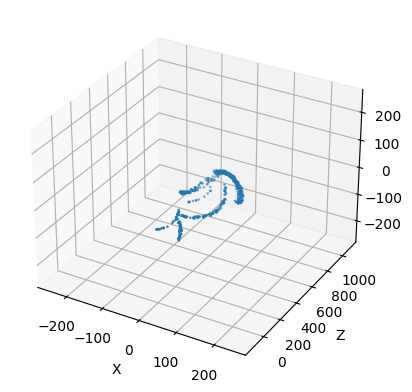

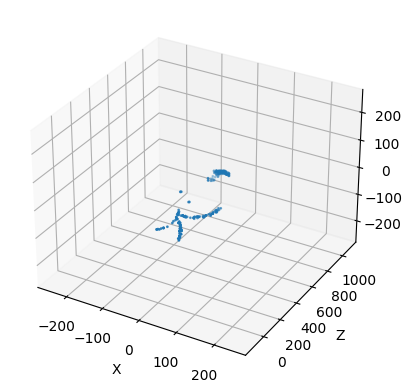

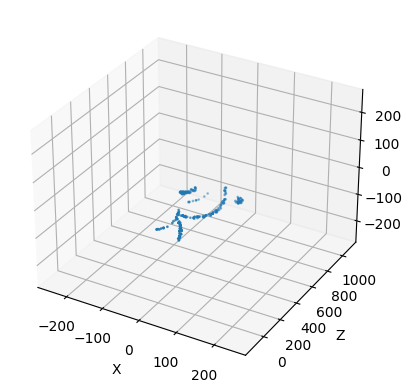

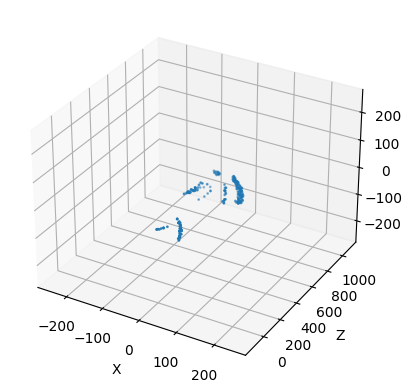

In [21]:
c = np.load(complete[2])
m = np.load(mid[2])
h = np.load(half[2])
r = np.load(rand[2])

for i in range(len(c)):

    scaled_vis(up_scale(c[i], scaleQ=False), showQ=False)
    scaled_vis(up_scale(m[i], scaleQ=False), showQ=False)
    scaled_vis(up_scale(h[i], scaleQ=False), showQ=False)
    scaled_vis(up_scale(r[i], scaleQ=False), showQ=False)

    flag = input('Do you want to continue?')
    if flag == 'y':
        clear_output()
        continue
    else:
        break
    